# PHYS 598 - Space Physics

## Dr. Emma Spanswick

#### Filobateer Ghaly - 10175960

____

## Anomalies in Prototype Riometer Instrument

### An investigation using HF and VHF ionospheric propagation to describe a sharp absorption peak in both terrestial and sky signals.
___

## Method of Investigation - II

### Ray Tracing

The second way in which we are conducting this investigation is through means of ray tracing. By looking at the different ways rays approach Gillam from known transmitters, we are able to distinguish the bands of frequencies that make it to the riometer by bouncing off the ionosphere. To setup this process, we begin by modelling the **Field of View** (FOV) of the riometer.

To begin this part of the investigation, we will be doing ray traces coming from **Alert, Nunavut** to **Gillam, Manitoba**. These ray traces wil be done at the following frequencies closest to: $ 5.382, 6.9285, 8.0995, 10.422, 11.107, $ and  $ 14.3704 \  \mathrm{MHz} $ which are known to be transmitted from Alert.

##### The tools developed in this part of the investigation will follow through when investigating other known transmitters.

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
from pathlib import Path

# A function that reads files and returns three colums of the data
# First col = latitude, 2nd col = longitude, 3rd col = altitude
def Read_3_Column_File(file_name):
    data  = open(file_name, 'r'); lines = data.readlines();
    
    #Remove first line
    lines.pop(0)
    lat = []; long = []; alt = [];

    for line in lines:
        p = line.split()
        lat.append(float(p[0])); long.append(float(p[1])); alt.append(float(p[2]));
        
    data.close()
    return lat, long, alt

# We need an 89 by 89 matrix that would hold the latitudes and one that would hold the altitudes

def GimmeLats_alts(num, name):
    Lats = [[0]*89]*89; Alts = [[0]*89]*89; Long = [[0]*89]*89
    for i in range (0,num-1):
        file_string = '20191124_15UT' + name  + '/rayout_e'+ str(i+1) + name + '.txt'
        list_lat, list_long, list_alt = np.asarray(Read_3_Column_File(file_string))
        
        Lats[i] = list_lat; Alts[i] = list_alt; Long[i] = list_long
    return Lats, Alts, Long

def set_labels(fig, freq, units = 'deg'):
    
    if units == 'deg':
        plt.xlabel('Geographic Latitude - (Degrees)')
    else: plt.xlabel('Geographic Latitude - (Km)')
    plt.ylabel('Altitude - (Km)')
    plt.title('Ray Trace - ' + str(freq) + ' MHz - Different Elevations')

def set_lims(x_min, x_max, y_min, y_max):
    ax.set_ylim(y_min, y_max)
    ax.set_xlim(x_min, x_max)
    

In [20]:
# Read the files
Lats5, Alts5   , Longs5   = GimmeLats_alts(90, '_5MHz')
Lats6, Alts6   , Longs6   = GimmeLats_alts(90, '_6MHz')
Lats8, Alts8   , Longs8   = GimmeLats_alts(90, '_8MHz')
Lats10, Alts10 , Longs10   = GimmeLats_alts(90, '_10MHz')
Lats11, Alts11 , Longs11   = GimmeLats_alts(90, '_11MHz')
Lats14, Alts14 , Longs14   = GimmeLats_alts(90, '_14MHz')

We start by showing what a **Single Frequency Ray Trace (RT)** looks like for a frequency of **10 MHz** and different elevation angles of $1^{\circ} $ separation:

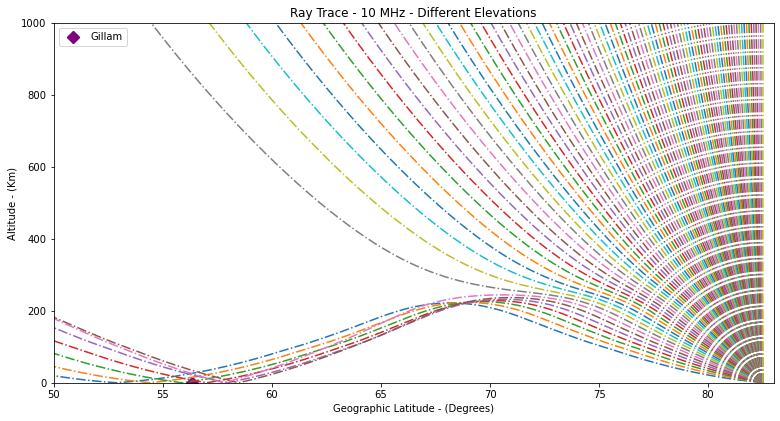

In [21]:
%matplotlib inline
fig = plt.figure(figsize=[10, 5]); ax = fig.add_axes([0, 0, 1, 1])
Gillam = 56.3480
for i in range(89):
    plt.plot(Lats10[i], Alts10[i],   linestyle = 'dashdot')

plt.scatter(Gillam, 0, marker = 'x', linewidth = 10, label = 'Gillam', color = 'Purple')
set_lims(50, 83, 0, 1000)
set_labels(fig, 10)

plt.legend(); plt.show()

We can repeat the process for all the frequencies in question to get the following 6-plot figure:

In [4]:
def plot_freq_ax(freq, Lats, Alts, fig = True, axes = None, legend = False):

    if fig: plt.figure(figsize=(14,7))
    ax = plt.gca() if axes is None else axes
    
    for i in range(89):
        ax.plot(Lats[i], Alts[i])
        
    ax.scatter(56.3480, 0, marker = "^", s = 150, label = 'Gillam', color = 'red')
    #ax.scatter(82, 0, marker = "^", s = 150, label = 'Alert', color = 'black')
    #ax.plot(Lats,Alts)
    
    ax.set_ylim(0, 1000)
    ax.set_xlim(50, 82)

    #ax.set_xlabel('Geographic Latitude - (Degrees)')
    #ax.set_ylabel('Altitude - (Km)')
    ax.set_title('Different Elevations for ' + freq + ' at 15 UT')
    if legend: ax.legend(loc = "best")

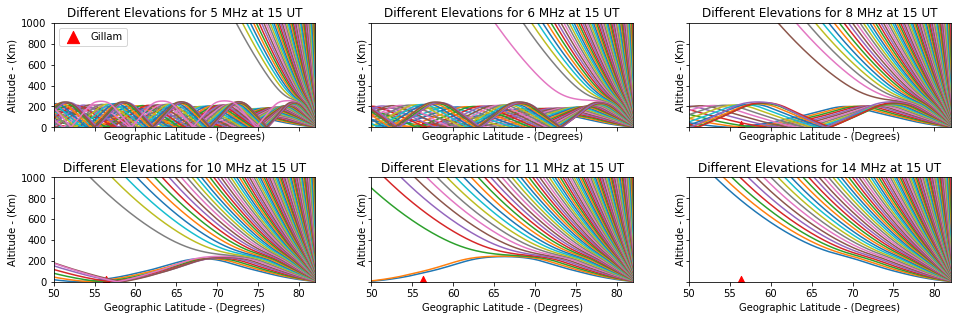

In [5]:
%matplotlib inline
fig, axes = plt.subplots(2,3, figsize=(14,5), sharex = True, sharey = True)
fig.tight_layout(pad=4.0)

plt.setp(axes, xlabel = 'Geographic Latitude - (Degrees)', ylabel = 'Altitude - (Km)' )


plot_freq_ax('5 MHz', Lats5, Alts5, fig = False, axes=axes[0,0], legend = True)
plot_freq_ax('6 MHz', Lats6, Alts6, fig = False, axes=axes[0,1])
plot_freq_ax('8 MHz', Lats8, Alts8, fig = False, axes=axes[0,2] )
plot_freq_ax('10 MHz', Lats10, Alts10, fig = False, axes=axes[1,0] )
plot_freq_ax('11 MHz', Lats11, Alts11, fig = False, axes=axes[1,1] )
plot_freq_ax('14 MHz', Lats14, Alts14, fig = False, axes=axes[1,2] )

We want to zoom in on Gillam to see exactly how the rays are reaching and at what angles relative to the FOV of the riometer. For that, we show the FOV which is a cone that makes an angle of $ \theta = 60^{\circ} $ with the ground. 

We know:
$$ \mathrm{slope} = m = tan(\theta) = tan(60) $$ 

We can also convert to **SI** metric units to get a sense of the scale of how wide that cone spreads at the top or its maximum radius:

$$ 1^{\circ} \space \mathrm{Latitude} =  110.574  ~km   $$

This is a good enough approximation for our purposes. In this picture, our reference will be the riometer itself, at Gillam.

In [6]:
m = np.tan(60 * np.pi /180)
Gillam = 56.3480*110.574

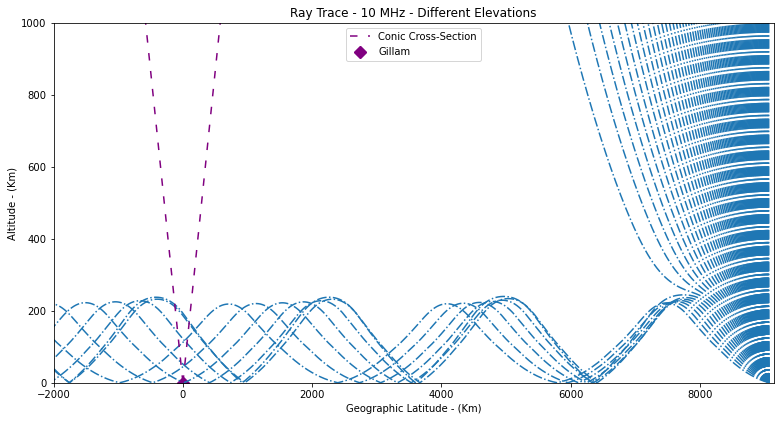

In [22]:
%matplotlib inline
fig = plt.figure(figsize=[10, 5])
ax = fig.add_axes([0, 0, 1, 1])
for i in range(89):
    plt.plot(Lats10[i]*110.574 - Gillam , Alts10[i], color = 'C0',  linestyle = 'dashdot')

plt.scatter(0 , 0, marker = 'x', linewidth = 10, label = 'Gillam', color = 'Purple')

linex = np.linspace(0, 9200, 10000); liney = m*linex; 

plt.plot(linex, liney, color = 'Purple', linestyle  = (0, (5, 7)), label = 'Conic Cross-Section')
plt.plot(-linex, liney, color = 'Purple',linestyle =  (0, (5, 7)))


set_lims(-2000, 9200 - Gillam, 0, 1000)
set_labels(fig, 10, 'km')

plt.legend(); plt.show()

The FOV of the riometer is drawn to reach the end of the figure, but in reality the conic cross-section should stop at about **105 Km** altitude, since from about **85** to **90 Km** and up to **160 Km**, there lies the **E-region** of the ionosphere. The lower bound over the altitude will vary with time of day and space-weather conditions but is at a level of about **100 Km** when the sun is vertical at noon.

In the E-region, the density of electrons is enough to absorb the radio wave as it travels through this region. Therefore, we highlight this region as rays coming through would not be detected by the riometer. 

The *region of interest* ranges from altitude of **85 to 105 Km.** Frequencies above **8 MHz** will only make a `Single Hop` before reaching the riometer, while lower frequencies could have multiple hops. 
___

We could also visualize this in three-dimensions, with the Longitude being the third. This will illustrate the above statement with more clarity and also transform the FoV region into a 3D cone. The following is the ray trace at **8 MHz**:

In [23]:
def set_labels3D(ax, x, y, z):
    ax.set_xlabel(x)
    ax.set_ylabel(y)
    ax.set_zlabel(z)

def set_lims3D(ax, xmin, xmax, ymin, ymax, zmin, zmax):
    ax.set_xlim3d(xmin, xmax)
    ax.set_ylim3d(ymin, ymax)
    ax.set_zlim3d(zmin, zmax)

In [25]:
%matplotlib notebook
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure();
ax = fig.gca(projection='3d');

for i in range(89):
    ax.plot(Lats8[i], Longs8[i], Alts8[i])
    
Gillam_Lat = 56.3480
Gillam_Long = 360-94.7091
ax.scatter(Gillam_Lat, Gillam_Long, marker = 'x', linewidth = 10, label = 'Gillam', color = 'red')

set_labels3D(ax, "Latitude", "Longitude", "Altitude")
set_lims3D(ax, 50, 100, 250, 300, 0, 1000)
ax.legend(loc = 'best');

<IPython.core.display.Javascript object>

To draw a cone we use the equation: 

$$ z = \sqrt{a^2 x^2 + b^2 y^2}  $$

Our radius goes from 0 to $ r = h \cdot tan(30) $ and our h goes from 0 to an altitude of 200 Km (this is arbitrary).

In [26]:
hf = 200
rf = hf * np.tan(30 *np.pi/180)

In [27]:
def truncated_cone(fig,ax, p0, p1, R0, R1, color, alpha = 0.5, label = None, legend = False):

    # vector in direction of axis
    v = p1 - p0
    # find magnitude of vector
    mag = np.linalg.norm(v)
    # unit vector in direction of axis
    v = v / mag
    # make some vector not in the same direction as v
    not_v = np.array([1, 1, 0])
    if (v == not_v).all():
        not_v = np.array([0, 1, 0])
    # make vector perpendicular to v
    n1 = np.cross(v, not_v)
    # print n1,'\t',norm(n1)
    # normalize n1
    n1 /= np.linalg.norm(n1)
    # make unit vector perpendicular to v and n1
    n2 = np.cross(v, n1)
    # surface ranges over t from 0 to length of axis and 0 to 2*pi
    n = 80
    t = np.linspace(0, mag, n)
    theta = np.linspace(0, 2 * np.pi, n)
    # use meshgrid to make 2d arrays
    t, theta = np.meshgrid(t, theta)
    R = np.linspace(R0, R1, n)
    # generate coordinates for surface
    X, Y, Z = [p0[i] + v[i] * t + R *
               np.sin(theta) * n1[i] + R * np.cos(theta) * n2[i] for i in [0, 1, 2]]
    c3 = ax.plot_surface(X, Y, Z, color=color, linewidth=0, antialiased=False, alpha = alpha, label = label)
    
    if legend:
        if label:
            c3._facecolors2d=c3._facecolors3d
            c3._edgecolors2d=c3._edgecolors3d
            ax.legend()

##### To find the final radius in Longitude units:

We can use the appriximation that:

$$ 1^{\circ} \space \mathrm{Longitude} =  111.32 \cdot cos(\mathrm{Latitude})   ~km   $$

At Gillam Latitude = 56.3480, we have:

In [28]:
rf_long = rf /(111.32 * np.cos(56.3480*np.pi/180))
print(rf_long)

1.8718497386734994


In [29]:
%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for i in range(89):
    ax.plot(Lats10[i], Longs10[i], Alts10[i], linestyle = 'dashdot', color = 'grey')
    
ax.scatter(Gillam_Lat, Gillam_Long, marker = 'x', linewidth = 10, label = 'Gillam', color = 'red')

set_labels3D(ax, "Latitude", "Longitude", "Altitude")
set_lims3D(ax, 50, 100, 250, 300, 0, 1000)
ax.legend(loc = 'best');

A0 = np.array([56.3480, 360-94.7091, 0])
A1 = np.array([56.3480, 360-94.7091, 200])

truncated_cone(fig,ax, A0, A1, 0, rf_long, 'C0', alpha = 0.2, legend = True);

<IPython.core.display.Javascript object>

The cone can also highlight the region of interest but without the approximation of the rectangular box and incorporating the Longitude dimension. We can then proceed to make a similar 6-graph figure but this time zoomed in on the regions of interest.
___

#### Optimization

To optimize this process we can truncate the line plots by limiting them to the first *10000* sets of coordinates. We need only trace up to a certain point **(Gillam)**.

In [14]:
#len(Lats5[1])

In [30]:
r85 = 85 * np.tan(30 * np.pi /180)
r105 = 105 * np.tan(30 * np.pi /180)

r85_long = r85 /(111.32 * np.cos(56.3480*np.pi/180))
r105_long = r105 /(111.32 * np.cos(56.3480*np.pi/180))

def plot_ax(fig, fignumber, ray_num, title, Lats, Longs, Alts, linestyle = 'dashdot', color = 'grey' , legend = False):

    ax = fig.add_subplot(2, 3, fignumber, projection='3d')
    ax.set_title(title)
    
    ax.view_init(elev=9, azim=-100)
    
    tunc = 10000
    
    for i in range(ray_num):
        #ax.plot(Lats5[i][0:tunc], Longs5[i][0:tunc], Alts5[i][0:tunc], linestyle = 'dashdot', color = 'grey')
        #ax.plot(Lats6[i][0:tunc], Longs6[i][0:tunc], Alts6[i][0:tunc], linestyle = 'dashdot', color = 'black')
        #ax.plot(Lats8[i][0:tunc], Longs8[i][0:tunc], Alts8[i][0:tunc], linestyle = 'dashdot', color = 'blue')
        ax.plot(Lats[i][0:tunc], Longs[i][0:tunc], Alts[i][0:tunc], linestyle = linestyle, color = color)
        #ax.plot(Lats11[i][0:tunc], Longs11[i][0:tunc], Alts11[i][0:tunc], linestyle = 'dashdot', color = 'lightblue')
        #ax.plot(Lats14[i][0:tunc], Longs14[i][0:tunc], Alts14[i][0:tunc], linestyle = 'dashdot', color = 'cyan')
        
    ax.scatter(Gillam_Lat, Gillam_Long, marker = 'x', linewidth = 7, label = 'Gillam', color = 'purple')
    
    A0 = np.array([Gillam_Lat, Gillam_Long, 0])
    A1 = np.array([Gillam_Lat, Gillam_Long, 105])
    
    R0 = np.array([Gillam_Lat, Gillam_Long, 85])
    R1 = np.array([Gillam_Lat, Gillam_Long, 105])
    
    truncated_cone(fig, ax, A0, A1, 0, r105_long, 'C0', alpha=0.1, label = 'Riometer FOV', legend = legend)
    truncated_cone(fig, ax, R0, R1, r85_long, r105_long, 'purple', alpha=0.1, label = 'Region of Interest', legend = legend)
    
    set_labels3D(ax, "Latitude", "Longitude", "Altitude")
    set_lims3D(ax, 52, 60, 255, 275, 0, 200)
    
    if legend: ax.legend(loc = 'best')

In [31]:
%matplotlib notebook
fig = plt.figure(figsize=(14,5))

plot_ax(fig, 1, 20,  '5 MHz', Lats5, Longs5, Alts5 )
plot_ax(fig, 2 , 20, '6 MHz', Lats6, Longs6, Alts6 )
plot_ax(fig, 3 , 20, '8 MHz', Lats8, Longs8, Alts8 )
plot_ax(fig, 4 , 20, '10 MHz', Lats10, Longs10, Alts10 )
plot_ax(fig, 5 , 20, '11 MHz', Lats11, Longs11, Alts11 )
plot_ax(fig, 6 , 20, '14 MHz', Lats14, Longs14, Alts14 , legend = True)

<IPython.core.display.Javascript object>

A few key points:

- At lower frequencies, the reflection height is lower.
- Above 11 MHz, the wave passes through the ionosphere without being reflected back.
- At 11 Mhz, even though there is only a `Single Hop`, the ray reaches Gillam through the *E-region*. (ie. does not hit the riometer)

___

## Some Mathematics of Frequency Dependence: 
(Sean Victor Hum: Ionospheric Propagation - Radio and Microwave Wireless Systems)

The relative dielectric constant of the plasma is given by:

$$ \epsilon_r = 1 - \frac{\omega_p^2}{\omega^2 (1- j \nu / \omega)}  $$ 

Where $ \omega_p $ is the frequency of the plasma and the electron collison frequency is given by $ \nu $. Neglecting collisions:

$$ \epsilon_r = 1 - \frac{\omega_p^2}{\omega^2}  $$

In summary, this implies the following:

- For frequencies $\omega > \omega_p $, the effective dielectric constant is less than unity but the propagation constant is real. Hence, the wave will be refracted by the plasma according to the variation of $ \epsilon_r $ with altitude.

- For really high frequencies $ \omega >> \omega_p $, the wave essentially passes thorugh unrefracted. (simplified)

## Conclusion

As the frequency is increased from **10 to 11 MHz** *(in the IRI model)* the `Single-Hop` reflection height at low elevation angles is increased enough so that the ray reaches Gillam through the *E-region*. However, at **9 MHz** and below we could possibly trace rays that hit Gillam from the side *(outside the FOV)* and be able to describe the **Absorption Region**. 

The difference between `Single-Hop` profiles and `Multi-Hop` can be shown in a figure. While the rays experiencing a single hop can be absorbed only once in their journey to Gillam, during an interacting with the upper ionized E-region, the multi-hop rays could be absorbed at any point where they interact with that layer. To simplify our problem, we deal only with the `Single-Hop to Elevation Profiles` of the rays which hit Gillam but are for some reason not detected by the riometer as per the **Spectral Plot** in **Part I**.

In [17]:
def GimmeLats_alts_mod(num, name, name2):
    Lats = [[0]*89]*89
    Alts = [[0]*89]*89
    Longs = [[0]*89]*89
    for i in range (0,num-1):
        file_string = 'All_elevations/' + name  + '/rayout_elev'+ str(i) + 'p00deg_' +name2 + '.txt'
        list_lat, list_long, list_alt = np.asarray(Read_3_Column_File(file_string))
        
        Lats[i] = list_lat
        Alts[i] = list_alt
        Longs[i] = list_long
    return Lats, Alts, Longs

Lats8_single, Alts8_single, Longs8_single = GimmeLats_alts_mod(90,     '8MHz', '8100kHz')

In [32]:
%matplotlib notebook
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

from pathlib import Path
#fn = Path('mycoolfig.svg').expanduser()

fig = plt.figure(figsize=(14,5))

def make_earthPlots(fig, fignum, title, cond):
    ax = fig.add_subplot(1, 2, fignum, projection=ccrs.Mollweide())
    #ax = plt.axes(projection=ccrs.Mollweide())
    ax.stock_img()
    
    gil_lon, gil_lat =-94.7091, 56.348
    alert_lon, alert_lat = -62.3481, 82.5018
    
    #plt.plot([gil_lon, alert_lon], [gil_lat, alert_lat],color='crimson', linewidth=2, linestyle='--',transform=ccrs.Geodetic())
    plt.plot([gil_lon, alert_lon], [gil_lat, alert_lat],color='purple', linestyle='--',transform=ccrs.PlateCarree())
    
    plt.text(gil_lon - 1, gil_lat - 1, 'Gillam',
             horizontalalignment='right', color = 'purple',
             transform=ccrs.Geodetic())
    
    plt.text(alert_lon + 7, alert_lat - 7, 'Alert',horizontalalignment='left', color = 'purple',transform=ccrs.Geodetic())
    
    ax.set_extent([-90, -30, 40, 90])
    
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                      linewidth=2, color='gray', alpha=0.5, linestyle='--')
    #gl.xlabels_top = False
    #gl.ylabels_left = False
    gl.xlines = True
    gl.xlocator = mticker.FixedLocator([-135 ,-90, -25, 0])
    
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    
    if cond == 8:
        ax.plot(Longs8_single[4] - Alts8_single[4]/19 , Lats8_single[4] + Alts8_single[4]/19, transform =ccrs.Geodetic(), 
            color = 'crimson', label = '8 MHz', alpha = 1, linestyle = 'dashdot')
    
    if cond == 5:
        ax.plot(Longs5[10] - Alts5[10]/19 , Lats5[10]+ Alts5[10]/19, transform =ccrs.Geodetic(), 
            color = 'orange', label = '5 MHz', linestyle = 'dashdot')
    
    ax.coastlines()
    ax.set_title(title)

    plt.legend(loc = 'upper left')

make_earthPlots(fig, 1, '5 MHz: Multi-hop', 5)
make_earthPlots(fig, 2, ' 8 MHz: Single-hop', 8)
#fig.savefig(fn, bbox_inches='tight')

plt.show()

<IPython.core.display.Javascript object>

As can be seen in the plots, while at 5 MHz we see a ray hit Gillam in its FOV range, that ray passes through the E-region 2 times before it reaches. For the single hop at 8 Mhz, the ray hits the riometer from the side, not in the FOV range and we know exactly where it could have been absorbed. Though in our **Spectral Plot** there are no traces of 8 MHz rays reaching Gillam, according to this ray trace it should have. This means it must have been absorbed. From this we can deduce some information about the size of the abosrbing region relative to Alert, namely its minimum size. In **Part III** we follow along with the investigation using more ray traces to make a conclusion about the **Absorption Region**.